# 🤖 Using Free, Open LLMs Locally with Ollama

Welcome to the workshop! In this notebook, we'll use **free, open-source Large Language Models (LLMs)** running locally on your computer — no API keys, no cloud required!

We'll use **[Ollama](https://ollama.com)**, a lightweight tool that lets you run powerful LLMs locally. Our Python code communicates with it using the `requests` library, which is built into Python.

### Before you begin — one-time setup:
1. Download and install **Ollama** from [ollama.com](https://ollama.com)
2. Open your **Terminal** and pull the two models used in this notebook:
  
   `ollama pull llama3.2`
   
   `ollama pull phi3:3.8b`
   
   `ollama pull moondream`
   
3. Ollama will run quietly in the background — you're ready to go!

---

---
# 🎤 Part 1: Joke Teller

We'll use **Llama 3.2** and **Phi3** — text based models — to generate jokes on any subject.

## Step 1: Import Libraries and setup

In [1]:
import requests  # Built into Python — no install needed!

print("✅ Ready to go!")

✅ Ready to go!


In [2]:
models = {
    1: 'llama3.2',
    2: 'phi3:3.8b'
}

###### Change your model choice here!
model_choice = models[2]
print(model_choice)

phi3:3.8b


## Step 2: Write the Joke-Telling Function

This function builds a **prompt** and sends it to Ollama via an HTTP request.
The key concept: **prompt engineering** — how you phrase the instruction shapes the output!

In [9]:
def tell_joke(subject):
    """
    Generates a joke about the given subject using a local LLM via Ollama.

    Parameters:
        subject (str): The topic you want a joke about.

    Returns:
        str: A joke generated by the model.
    """
    # The 'prompt' is the instruction we send to the LLM.
    # How you phrase it greatly affects the output — this is called 'prompt engineering'!
    prompt = f"Tell me a short, funny joke about {subject}. Just the joke itself, nothing else."

    # Send an HTTP POST request to the local Ollama server
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={
            "model": f"{model_choice}",   # The model to use
            "prompt": prompt,       # Our instruction
            "stream": False         # Wait for the full response before returning
        }
    )

    # The response is JSON — we extract the generated text
    return response.json()["response"]

print("✅ Function defined!")

✅ Function defined!


## Step 3: Tell Me a Joke! 🎤

Try subjects like: `cats`, `programmers`, `coffee`, `libraries`, `Mondays`...

In [10]:
subject = input("Enter a subject for your joke: ")

print("\n🤔 Thinking of a joke...\n")

joke = tell_joke(subject)

print(f"🎤 Here's a joke about '{subject}':\n")
print(joke)

Enter a subject for your joke:  dogs



🤔 Thinking of a joke...

🎤 Here's a joke about 'dogs':

Why don't scientists trust atoms when they are dressed in yellow? Because they make up everything! And I bet that golden retriever thinks he is just as important because his 'scientist dad'. He must be a real Einstein puppy with its tail wagging equations.


## 🧪 Bonus: Experiment with Prompt Engineering!

| Prompt Style | Example |
|---|---|
| Simple ask | `"Tell me a short, funny joke about {subject}."` |
| Set a persona | `"You are a stand-up comedian. Tell a one-liner about {subject}."` |
| Specify format | `"Write a knock-knock joke about {subject}."` |
| Kid-friendly | `"Tell me a clean, family-friendly joke about {subject}."` |

In [11]:
subject = input("Enter a subject: ")

# Try editing this prompt!
custom_prompt = f"You are a stand-up comedian. Tell a clever one-liner about {subject}. Just the joke, nothing else."

print(f"\nPrompt sent to the model:\n  '{custom_prompt}'\n")
print("🤔 Thinking...\n")

response = requests.post(
    "http://localhost:11434/api/generate",
    json={"model": "llama3.2", "prompt": custom_prompt, "stream": False}
)

print(f"🎤 Result:\n{response.json()['response']}")

Enter a subject:  Thomas Jefferson



Prompt sent to the model:
  'You are a stand-up comedian. Tell a clever one-liner about Thomas Jefferson. Just the joke, nothing else.'

🤔 Thinking...

🎤 Result:
"I guess you could say Thomas Jefferson was a founding father of hypocrisy because he wrote the Declaration of Independence, but his personal life was more 'founding' a marriage than a family."


---
# 🖼️ Part 2: Image Alt Text Generator

Now we'll use a **vision model** — an LLM that can *see* images — to automatically generate alt text for a folder of images.

**Alt text** (alternative text) is a written description of an image used by:
- Screen readers for visually impaired users
- Search engines for indexing images
- Browsers when an image fails to load

### Model: `moondream`
We're switching to **Moondream**, a tiny but capable vision model (~900 MB) designed specifically for understanding and describing images. It runs entirely on your local machine.

> **Make sure you've pulled it first:**  
> Open Terminal and run: `ollama pull moondream`

## Step 1: Import Additional Libraries

All of these are **built into Python** — no pip install needed:
- `base64` — encodes images as text so they can be sent in a JSON request
- `pathlib` — a clean way to work with file paths and directories
- `IPython.display` — lets Jupyter notebooks display images inline

In [3]:
import base64
from pathlib import Path
from IPython.display import display, Image as IPImage

# requests is already imported from Part 1

print("✅ Libraries imported!")

✅ Libraries imported!


## Step 2: Write the Alt Text Function

Vision models work differently from text models. Instead of just a prompt, we also send the **image data** (encoded in base64) alongside our instruction.

The Ollama API makes this seamless — we just add an `"images"` field to our request.

In [4]:
def generate_alt_text(image_path):
    """
    Generates alt text for an image using a local vision LLM via Ollama.

    Parameters:
        image_path (str or Path): Path to the image file.

    Returns:
        str: A concise alt text description of the image.
    """
    # Read the image file and encode it as base64
    # Base64 converts binary image data into plain text so it can travel in JSON
    with open(image_path, "rb") as image_file:
        image_data = base64.b64encode(image_file.read()).decode("utf-8")

    # Craft a prompt asking for alt text specifically
    prompt = (
        "Generate concise alt text for this image. "
        "Describe what is shown clearly and objectively in one or two sentences, "
        "as if writing for a screen reader. Do not include phrases like 'This image shows' — "
        "just describe the content directly."
    )

    # Send the prompt AND the image to the Ollama vision model
    response = requests.post(
        "http://localhost:11434/api/generate",
        json={
            "model": "moondream",       # Vision-capable model
            "prompt": prompt,
            "images": [image_data],     # List of base64-encoded images
            "stream": False
        }
    )

    return response.json()["response"].strip()

print("✅ Function defined!")

✅ Function defined!


## Step 3: Process a Folder of Images

Enter the path to a folder of images below. The script will:
1. Find all image files (`.jpg`, `.jpeg`, `.png`, `.gif`, `.webp`)
2. Display a preview of each image
3. Send it to the vision model
4. Print the generated alt text

**Edit the `image_folder` path in the cell below to point to your images.**

Found 4 image(s) in 'AltTextImages'. Generating alt text...


[1/4] olympics1.jpg
----------------------------------------


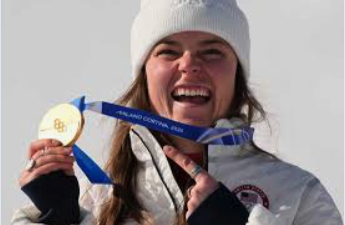

🤔 Generating alt text...
📝 Alt text:
urn of gold and blue metal with white lettering on it.

[2/4] olympics2.jpg
----------------------------------------


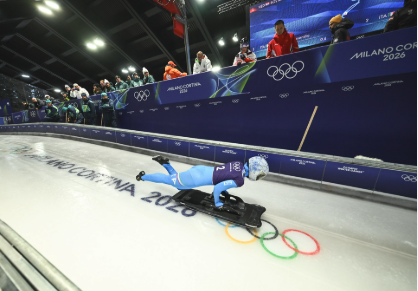

🤔 Generating alt text...
📝 Alt text:
iced skating rink with blue and white logo and words "Milano 2020" on it.

[3/4] olympics3.jpg
----------------------------------------


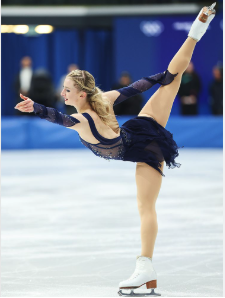

🤔 Generating alt text...
📝 Alt text:
iced skating rink with a woman in blue dress doing a split on ice.

[4/4] olympics4.jpg
----------------------------------------


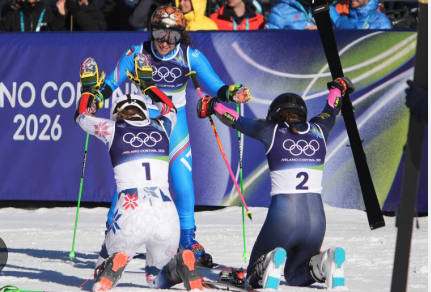

🤔 Generating alt text...
📝 Alt text:
ers of a ski race with numbers 2 and 1 on their bibs.

✅ Done! All images processed.


In [6]:
# ✏️  Change this to the path of your image folder:
image_folder = "AltTextImages"

# Supported image formats
IMAGE_EXTENSIONS = {".jpg", ".jpeg", ".png", ".gif", ".webp"}

# Find all image files in the folder
folder = Path(image_folder)
image_files = [f for f in sorted(folder.iterdir()) if f.suffix.lower() in IMAGE_EXTENSIONS]

if not image_files:
    print(f"⚠️  No image files found in: {image_folder}")
    print("Make sure the path is correct and the folder contains .jpg, .jpeg, .png, .gif, or .webp files.")
else:
    print(f"Found {len(image_files)} image(s) in '{folder.name}'. Generating alt text...\n")
    print("=" * 60)

    for i, image_path in enumerate(image_files, start=1):
        print(f"\n[{i}/{len(image_files)}] {image_path.name}")
        print("-" * 40)

        # Display a preview of the image inline in the notebook
        display(IPImage(filename=str(image_path), width=300))

        # Generate alt text
        print("🤔 Generating alt text...")
        alt_text = generate_alt_text(image_path)

        print(f"📝 Alt text:\n{alt_text}")
        print("=" * 60)

    print("\n✅ Done! All images processed.")

---
## 💡 Key Takeaways

### On vision models:
- **Vision LLMs** can process both text and images — enabling use cases like alt text, image search, document analysis, and more.
- Sending an image to the model is as simple as encoding it in **base64** and including it in the API request.
- **Moondream** is tiny and purpose-built for image description. Larger vision models like `llava` or `llama3.2-vision` produce richer descriptions.

### On the broader picture:
- Both use cases in this notebook — text and vision — use the **same API pattern**: send a prompt, get a response.
- The only difference is the model name and adding an `"images"` field.
- Ollama supports many vision models. Browse them at [ollama.com/library](https://ollama.com/library) and filter by **Vision** capability.

### Want to improve the alt text?
Try editing the prompt in `generate_alt_text()` to change the style:
```python
# More detailed:
prompt = "Describe this image in detail for someone who cannot see it."

# SEO-focused:
prompt = "Write a short, keyword-rich alt text description for this image suitable for a website."
```